# Mencari Most Influential User pada Topik #PercumaLaporPolisi di Jejaring Sosial Twitter Menggunakan Degree Centrality

Dendy Andra A.N - 1301184280 <br>
Thomi Ridho Al Farid - 1301180226

In [1]:
import pandas as pd
import networkx as nx
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network

## Load Dataset

In [2]:
data = pd.read_csv('tweet data - #PercumaLaporPolisi.csv')
data.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1447713621182582785,jigrek,RT @siputriwidi: Pembuktian pemerkosaan tidak ...,Mon Oct 11 23:59:59 +0000 2021,12/10/2021 00:59:59,NaN,NaN,NaN,NaN,197675032,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1437774087...,247.0,323.0,middle earth,http://twitter.com/jigrek/statuses/14477136211...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1447713594024415237,shellydevina,RT @audhinafh: This tweet is a perfect of embo...,Mon Oct 11 23:59:52 +0000 2021,12/10/2021 00:59:52,NaN,NaN,NaN,NaN,159732495,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1075154219...,447.0,633.0,"Gresik, Indonesia",http://twitter.com/shellydevina/statuses/14477...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2,1447713583324753920,RevyHA,RT @B51_Siluman: Melihat cuplikan pak Junior T...,Mon Oct 11 23:59:50 +0000 2021,12/10/2021 00:59:50,NaN,NaN,NaN,NaN,540637861,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1408212470...,370.0,231.0,"Gunung Putri, Indonesia",http://twitter.com/RevyHA/statuses/14477135833...,"{""hashtags"":[{""text"":""PolriSesuaiProsedur"",""in..."
3,1447713562709741570,Jarpoel_,RT @BaharrudinPrb12: Saling balas tagar #Percu...,Mon Oct 11 23:59:45 +0000 2021,12/10/2021 00:59:45,NaN,NaN,NaN,NaN,398646917,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1254437285...,419.0,697.0,"Jakarta Selatan, DKI Jakarta",http://twitter.com/Jarpoel_/statuses/144771356...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
4,1447713530073866241,jen_s_pov,RT @remotivi: Sepotong surat untuk polisi dari...,Mon Oct 11 23:59:37 +0000 2021,12/10/2021 00:59:37,NaN,NaN,NaN,NaN,1257908254417416193,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1443279067...,160.0,319.0,"Tsushima-shi, Nagasaki",http://twitter.com/jen_s_pov/statuses/14477135...,"{""hashtags"":[{""text"":""MejaRedaksi"",""indices"":[..."


In [3]:
data.describe(include='all')

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
count,2.970000e+03,2970,2970,2970,2970,0.0,0.0,3.410000e+02,341,2.970000e+03,3.380000e+02,2970,2970,2.897000e+03,2950.000000,1924,2970,2970
unique,NaN,2405,964,2880,2880,NaN,NaN,NaN,124,NaN,NaN,18,2381,NaN,NaN,973,2970,878
top,NaN,ahmagun13,RT @secgron: Bedain media dan web pribadi aja ...,Mon Oct 11 12:42:10 +0000 2021,11/10/2021 12:31:24,NaN,NaN,NaN,M1_nusaputra,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,Indonesia,http://twitter.com/yudhi__pramono/statuses/144...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
freq,NaN,25,336,2,2,NaN,NaN,NaN,62,NaN,NaN,2111,43,NaN,NaN,193,1,336
mean,1.447581e+18,NaN,NaN,NaN,NaN,NaN,NaN,6.601000e+17,NaN,4.214857e+17,1.447451e+18,NaN,NaN,2.336449e+04,631.298305,NaN,NaN,NaN
std,7.271523e+13,NaN,NaN,NaN,NaN,NaN,NaN,6.236271e+17,NaN,5.683559e+17,2.320858e+14,NaN,NaN,5.234325e+05,956.726714,NaN,NaN,NaN
min,1.447468e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.546583e+07,NaN,9.221962e+06,1.445938e+18,NaN,NaN,1.000000e+00,1.000000,NaN,NaN,NaN
25%,1.447520e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.241716e+08,NaN,2.070024e+08,1.447421e+18,NaN,NaN,1.050000e+02,180.000000,NaN,NaN,NaN
50%,1.447579e+18,NaN,NaN,NaN,NaN,NaN,NaN,9.018823e+17,NaN,1.043511e+09,1.447513e+18,NaN,NaN,3.070000e+02,370.000000,NaN,NaN,NaN
75%,1.447625e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.303348e+18,NaN,1.077348e+18,1.447555e+18,NaN,NaN,6.790000e+02,700.750000,NaN,NaN,NaN


## Preprocessing Data

### Mengubah tipe data id menjadi string

In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_str                     2970 non-null   int64  
 1   from_user                  2970 non-null   object 
 2   text                       2970 non-null   object 
 3   created_at                 2970 non-null   object 
 4   time                       2970 non-null   object 
 5   geo_coordinates            0 non-null      float64
 6   user_lang                  0 non-null      float64
 7   in_reply_to_user_id_str    341 non-null    float64
 8   in_reply_to_screen_name    341 non-null    object 
 9   from_user_id_str           2970 non-null   int64  
 10  in_reply_to_status_id_str  338 non-null    float64
 11  source                     2970 non-null   object 
 12  profile_image_url          2970 non-null   object 
 13  user_followers_count       2897 non-null   float

In [6]:
df['id_str'] = df['id_str'].apply(str)
df['in_reply_to_user_id_str'] = df['in_reply_to_user_id_str'].apply(str)
df['from_user_id_str'] = df['from_user_id_str'].apply(str)
df['in_reply_to_status_id_str'] = df['in_reply_to_status_id_str'].apply(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_str                     2970 non-null   object 
 1   from_user                  2970 non-null   object 
 2   text                       2970 non-null   object 
 3   created_at                 2970 non-null   object 
 4   time                       2970 non-null   object 
 5   geo_coordinates            0 non-null      float64
 6   user_lang                  0 non-null      float64
 7   in_reply_to_user_id_str    2970 non-null   object 
 8   in_reply_to_screen_name    341 non-null    object 
 9   from_user_id_str           2970 non-null   object 
 10  in_reply_to_status_id_str  2970 non-null   object 
 11  source                     2970 non-null   object 
 12  profile_image_url          2970 non-null   object 
 13  user_followers_count       2897 non-null   float

### Drop kolom
Menghilangkan kolom yang tidak digunakan

In [8]:
df.drop(
    ['created_at', 
     'time',
     'geo_coordinates', 
     'user_lang', 
     'source', 
     'profile_image_url', 
     'user_location', 
     'status_url',
     'in_reply_to_status_id_str',
     'in_reply_to_user_id_str',
     'from_user_id_str'
    ], 
    axis=1, 
    inplace=True)


In [9]:
df.shape

(2970, 7)

### Menambah kolom user yang di mention di tweet / retweet

In [10]:
# nodes dari user yang di mention di tweet / retweet
nodes_mention = []
for i in range(len(df['entities_str'])):
    user_entity = json.loads(df['entities_str'].iloc[i] )
    user_mention = user_entity['user_mentions']
    if len(user_mention) != 0:
        list_tmp = []
        for j in range(len(user_mention)):
            res = dict(user_mention[j])
            list_tmp.append(res['screen_name'])
        nodes_mention.append(list_tmp)
    else:
        nodes_mention.append(None)

df['user_mentioned'] = pd.Series(nodes_mention)
df.drop(['entities_str'], axis=1, inplace=True)

In [11]:
df.head()

,id_str,from_user,text,in_reply_to_screen_name,user_followers_count,user_friends_count,user_mentioned
0,1447713621182582785,jigrek,RT @siputriwidi: Pembuktian pemerkosaan tidak ...,NaN,247.0,323.0,[siputriwidi]
1,1447713594024415237,shellydevina,RT @audhinafh: This tweet is a perfect of embo...,NaN,447.0,633.0,[audhinafh]
2,1447713583324753920,RevyHA,RT @B51_Siluman: Melihat cuplikan pak Junior T...,NaN,370.0,231.0,[B51_Siluman]
3,1447713562709741570,Jarpoel_,RT @BaharrudinPrb12: Saling balas tagar #Percu...,NaN,419.0,697.0,[BaharrudinPrb12]
4,1447713530073866241,jen_s_pov,RT @remotivi: Sepotong surat untuk polisi dari...,NaN,160.0,319.0,[remotivi]


## Exploratory Data Analysis
Analisa dataset yang digunakan

### Deskripsi dataset

In [12]:
df.describe(include='all')

,id_str,from_user,text,in_reply_to_screen_name,user_followers_count,user_friends_count,user_mentioned
count,2970,2970,2970,341,2.897000e+03,2950.000000,2478
unique,2970,2405,964,124,NaN,NaN,298
top,1447476368598462467,ahmagun13,RT @secgron: Bedain media dan web pribadi aja ...,M1_nusaputra,NaN,NaN,[mardiasih]
freq,1,25,336,62,NaN,NaN,382
mean,NaN,NaN,NaN,NaN,2.336449e+04,631.298305,NaN
std,NaN,NaN,NaN,NaN,5.234325e+05,956.726714,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.050000e+02,180.000000,NaN
50%,NaN,NaN,NaN,NaN,3.070000e+02,370.000000,NaN
75%,NaN,NaN,NaN,NaN,6.790000e+02,700.750000,NaN


### Top 10 user berdasarkan jumlah tweet di dataset

In [13]:
top_10_from_user = df['from_user'].value_counts()[:10]
pd.DataFrame(top_10_from_user)

,from_user
ahmagun13,25
stickycry,12
artksara,11
BatamWish,9
dpTania,8
albutix1106,8
AgenParfume,7
svytd,7
RevyHA,7
BaharrudinPrb12,6


### Top 10 user yang banyak di-reply tweetnya di dataset

In [14]:
top_10_reply_to_screen_name = df['in_reply_to_screen_name'].value_counts()[:10]
pd.DataFrame(top_10_reply_to_screen_name)

,in_reply_to_screen_name
M1_nusaputra,62
txtdrpemerintah,47
KompasTV,26
tempodotco,14
mardiasih,11
BatamWish,9
tvOneNews,9
HumasPoldaJatim,8
detikcom,6
mawakresna,4


### Top 10 kombinasi user yang di-mention

In [15]:
top_10_mentioned_user = df['user_mentioned'].value_counts()[:10]
pd.DataFrame(top_10_mentioned_user)

,user_mentioned
[mardiasih],382
[secgron],349
[remotivi],248
[foeux],215
[fullmoonfolks],98
"[aulianastiti, DivHumas_Polri, remotivi]",68
[projectm_org],52
[txtdrpemerintah],48
[M1_nusaputra],43
[BeckzJr7],37


In [16]:
df.sort_values(by=['user_followers_count'], ascending=False).head(5)

,id_str,from_user,text,in_reply_to_screen_name,user_followers_count,user_friends_count,user_mentioned
194,1447706245440360452,detikcom,Usai tagar #PercumaLaporPolisi sempat menjadi ...,NaN,17139986.0,30.0,None
1139,1447596685488689152,detikcom,Tagar #PercumaLaporPolisi disebut harus menjad...,NaN,17139986.0,30.0,None
2382,1447509625943724034,kompascom,Thread\n\nWakil Ketua Komisi III DPR dari Frak...,NaN,8243291.0,25.0,None
1523,1447574458743545860,kompascom,"""Seharusnya, ramai tagar #PercumaLaporPolisi d...",NaN,8243291.0,25.0,None
2381,1447509645275262983,kompascom,Kririk keras diutarakan oleh Kepala Divisi Adv...,kompascom,8243291.0,25.0,None


### Deskripsi statistik jumlah follower dan following di dataset

In [17]:
df[['user_followers_count', 'user_friends_count']].describe()

,user_followers_count,user_friends_count
count,2.897000e+03,2950.000000
mean,2.336449e+04,631.298305
std,5.234325e+05,956.726714
min,1.000000e+00,1.000000
25%,1.050000e+02,180.000000
50%,3.070000e+02,370.000000
75%,6.790000e+02,700.750000
max,1.713999e+07,12483.000000


## Membangun network user

### Membuat list nodes

In [18]:
nodes_from_user = list(df['from_user'].unique())
nodes_in_reply_to_screen_name = list(df['in_reply_to_screen_name'].unique())
nodes_mention = list(df["user_mentioned"].explode().unique() )

In [19]:
print(len(nodes_from_user))
print(len(nodes_in_reply_to_screen_name))
print(len(nodes_mention))

2405
125
357


In [20]:
# merge list
node_list= list(set(nodes_from_user) | set(nodes_in_reply_to_screen_name) | set(nodes_mention))
len(node_list)

2647

In [21]:
df[(df['in_reply_to_screen_name'].notnull()) & (df['user_mentioned'].notnull())]

,id_str,from_user,text,in_reply_to_screen_name,user_followers_count,user_friends_count,user_mentioned
33,1447712970042064900,thelotnoks,"#PercumaLaporPolisi kemarenan rame, bukannya j...",thelotnoks,492.0,794.0,[projectm_org]
63,1447712151297159169,kadestumaritis,@RadioElshinta Makanya jgn heran kmren ad taga...,RadioElshinta,19.0,165.0,[RadioElshinta]
73,1447711635255160836,hend_susandi,@KompasTV #PercumaLaporPolisi,KompasTV,18.0,53.0,[KompasTV]
81,1447711077941190659,_erikestrada,@M1_nusaputra Wkwkwkwkwkwk top nya model2 begi...,M1_nusaputra,72.0,213.0,[M1_nusaputra]
84,1447710944230920192,penyintasdelusi,@M1_nusaputra @fahrisalam padahal tagar #Percu...,M1_nusaputra,41.0,1345.0,"[M1_nusaputra, fahrisalam]"
...,...,...,...,...,...,...,...
2890,1447472324278587398,halupulisi,@Updatext #PercumaLaporPolisi,Updatext,22399.0,650.0,[Updatext]
2891,1447472295144931329,san08568756,@tempodotco Untuk menjaga nama baik Cireng\nAl...,tempodotco,151.0,321.0,[tempodotco]
2897,1447471786740752385,angchIImo,@cham_archamm @icecoffeematcha @humasjakfire b...,cham_archamm,114.0,333.0,"[cham_archamm, icecoffeematcha, humasjakfire]"
2898,1447471773176401920,nanang_gunz32,@tempodotco @mohmahfudmd silahkan menanggapi\n...,tempodotco,309.0,454.0,"[tempodotco, mohmahfudmd]"


In [22]:
df[df['in_reply_to_screen_name'].notnull()]

,id_str,from_user,text,in_reply_to_screen_name,user_followers_count,user_friends_count,user_mentioned
33,1447712970042064900,thelotnoks,"#PercumaLaporPolisi kemarenan rame, bukannya j...",thelotnoks,492.0,794.0,[projectm_org]
63,1447712151297159169,kadestumaritis,@RadioElshinta Makanya jgn heran kmren ad taga...,RadioElshinta,19.0,165.0,[RadioElshinta]
73,1447711635255160836,hend_susandi,@KompasTV #PercumaLaporPolisi,KompasTV,18.0,53.0,[KompasTV]
81,1447711077941190659,_erikestrada,@M1_nusaputra Wkwkwkwkwkwk top nya model2 begi...,M1_nusaputra,72.0,213.0,[M1_nusaputra]
84,1447710944230920192,penyintasdelusi,@M1_nusaputra @fahrisalam padahal tagar #Percu...,M1_nusaputra,41.0,1345.0,"[M1_nusaputra, fahrisalam]"
...,...,...,...,...,...,...,...
2891,1447472295144931329,san08568756,@tempodotco Untuk menjaga nama baik Cireng\nAl...,tempodotco,151.0,321.0,[tempodotco]
2897,1447471786740752385,angchIImo,@cham_archamm @icecoffeematcha @humasjakfire b...,cham_archamm,114.0,333.0,"[cham_archamm, icecoffeematcha, humasjakfire]"
2898,1447471773176401920,nanang_gunz32,@tempodotco @mohmahfudmd silahkan menanggapi\n...,tempodotco,309.0,454.0,"[tempodotco, mohmahfudmd]"
2950,1447469327175675904,oliberrian,Meni gamau bgt di kritik sampe naikin tagar ta...,oliberrian,459.0,521.0,None


### Membuat list edge

In [23]:
edge_list = []
for i in range(len(df['from_user'])):
    # kondisi 1 : retweet
    if (df.loc[i, ['in_reply_to_screen_name']].isna()).bool() and (df.loc[i, ['user_mentioned']].notnull()).bool():
        u = df['user_mentioned'].iloc[2898]
        for j in range(len(u)):
            edge_list.append((df['from_user'].iloc[i], u[j]))
            
    # kondisi 2: reply tweet user lain
    elif (df.loc[i, ['in_reply_to_screen_name']].notnull()).bool() and (df.loc[i, ['user_mentioned']].notnull()).bool():
        edge_list.append((df['from_user'].iloc[i], df['in_reply_to_screen_name'].iloc[i]))
len(edge_list)

4646

### Membuat graph

#### Undirected graph

In [24]:
# buat undirected graph
G = nx.Graph()

In [25]:
G.add_nodes_from(node_list)

In [26]:
G.add_edges_from(edge_list)

In [27]:
print("jumlah nodes:",G.number_of_nodes())
print("jumlah edges:",G.number_of_edges())

jumlah nodes: 2647
jumlah edges: 3849


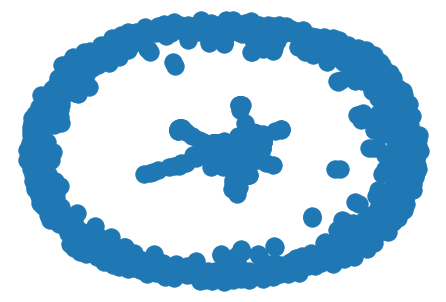

In [28]:
nx.draw(G)

#### Directed graph

In [24]:
# buat directed graph
dg = nx.DiGraph()

In [25]:
dg.add_nodes_from(node_list)

In [26]:
dg.add_edges_from(edge_list)

In [27]:
print("jumlah nodes:",dg.number_of_nodes())
print("jumlah edges:",dg.number_of_edges())

jumlah nodes: 2647
jumlah edges: 3851


### Menghitung degree centrality setiap nodes

#### Undirected graph result

In [28]:
deg_centrality = nx.degree_centrality(G)
deg_centrality

{'Sutardi85A': 0.0,
 'EdaMahardika': 0.0007558578987150416,
 nan: 0.0,
 'bojoneadit': 0.0003779289493575208,
 'shelenite': 0.0007558578987150416,
 'SebayangRimonta': 0.0007558578987150416,
 'AlissaWahid': 0.0,
 'geegia8': 0.0,
 'dnrdfh_': 0.0007558578987150416,
 'yourlovelyboyy': 0.0007558578987150416,
 'znyndie': 0.0007558578987150416,
 'mgumyeah': 0.0,
 'koganenohikari': 0.0007558578987150416,
 'toarsapada': 0.0,
 'rizalfitranaa': 0.0007558578987150416,
 'rohmanmomo': 0.0007558578987150416,
 'ahgelaap': 0.0,
 'hide0vs': 0.0007558578987150416,
 'infobogor': 0.0,
 'Laeelalala': 0.0003779289493575208,
 'lukmanjuwono': 0.0007558578987150416,
 'atar_pemberani': 0.0007558578987150416,
 'thoha_ua': 0.0,
 'FahmiAgustian': 0.0007558578987150416,
 'tomick_': 0.0007558578987150416,
 'ozanidolaanda': 0.0007558578987150416,
 'Hizzam_Muhammad': 0.0007558578987150416,
 'Malbor0c': 0.0007558578987150416,
 'mengmengouou': 0.0007558578987150416,
 'Jarpoel_': 0.0007558578987150416,
 'rizally13': 0.0003

#### Directed graph result

In [29]:
# in-degree centrality
in_deg_centrality = nx.in_degree_centrality(dg)
in_deg_centrality

{'Sutardi85A': 0.0,
 'EdaMahardika': 0.0,
 nan: 0.0,
 'bojoneadit': 0.0,
 'shelenite': 0.0,
 'SebayangRimonta': 0.0,
 'AlissaWahid': 0.0,
 'geegia8': 0.0,
 'dnrdfh_': 0.0,
 'yourlovelyboyy': 0.0,
 'znyndie': 0.0,
 'mgumyeah': 0.0,
 'koganenohikari': 0.0,
 'toarsapada': 0.0,
 'rizalfitranaa': 0.0,
 'rohmanmomo': 0.0007558578987150416,
 'ahgelaap': 0.0,
 'hide0vs': 0.0,
 'infobogor': 0.0,
 'Laeelalala': 0.0003779289493575208,
 'lukmanjuwono': 0.0,
 'atar_pemberani': 0.0,
 'thoha_ua': 0.0,
 'FahmiAgustian': 0.0,
 'tomick_': 0.0,
 'ozanidolaanda': 0.0,
 'Hizzam_Muhammad': 0.0,
 'Malbor0c': 0.0,
 'mengmengouou': 0.0,
 'Jarpoel_': 0.0,
 'rizally13': 0.0,
 'sigitprvsetyo': 0.0,
 'fullmoonfolks': 0.0007558578987150416,
 'BaksOjan': 0.0,
 'Adrntmbn': 0.0,
 'hiakufaris': 0.0,
 'mohmahfudmd': 0.6708238851095994,
 'amoiami': 0.0,
 'agilabiyoso': 0.0,
 'FAntasanusa': 0.0,
 'achaaaxoxo': 0.0,
 'sentimenpositif': 0.0,
 'fauzanhw': 0.0,
 'Askila_Masvi': 0.0,
 'babahliong': 0.0,
 'arcane109': 0.0,
 'et

In [30]:
#out-degree centrality
out_deg_centrality = nx.out_degree_centrality(dg)
out_deg_centrality

{'Sutardi85A': 0.0,
 'EdaMahardika': 0.0007558578987150416,
 nan: 0.0,
 'bojoneadit': 0.0003779289493575208,
 'shelenite': 0.0007558578987150416,
 'SebayangRimonta': 0.0007558578987150416,
 'AlissaWahid': 0.0,
 'geegia8': 0.0,
 'dnrdfh_': 0.0007558578987150416,
 'yourlovelyboyy': 0.0007558578987150416,
 'znyndie': 0.0007558578987150416,
 'mgumyeah': 0.0,
 'koganenohikari': 0.0007558578987150416,
 'toarsapada': 0.0,
 'rizalfitranaa': 0.0007558578987150416,
 'rohmanmomo': 0.0,
 'ahgelaap': 0.0,
 'hide0vs': 0.0007558578987150416,
 'infobogor': 0.0,
 'Laeelalala': 0.0003779289493575208,
 'lukmanjuwono': 0.0007558578987150416,
 'atar_pemberani': 0.0007558578987150416,
 'thoha_ua': 0.0,
 'FahmiAgustian': 0.0007558578987150416,
 'tomick_': 0.0007558578987150416,
 'ozanidolaanda': 0.0007558578987150416,
 'Hizzam_Muhammad': 0.0007558578987150416,
 'Malbor0c': 0.0007558578987150416,
 'mengmengouou': 0.0007558578987150416,
 'Jarpoel_': 0.0007558578987150416,
 'rizally13': 0.0003779289493575208,
 

### Top-10 Most Influential User

#### Degree centrality undirected graph

In [31]:
deg_df = pd.DataFrame(deg_centrality.items(), columns=['user_screen_name','degree_centrality_values'])
deg_df.sort_values(by=['degree_centrality_values'], ascending=False, inplace=True, ignore_index=True)
deg_df[:10]

,user_screen_name,degree_centrality_values
0,tempodotco,0.676115
1,mohmahfudmd,0.670824
2,M1_nusaputra,0.023054
3,txtdrpemerintah,0.017385
4,KompasTV,0.009448
5,ahmagun13,0.004157
6,mardiasih,0.003779
7,tvOneNews,0.003401
8,HumasPoldaJatim,0.002646
9,detikcom,0.002268


#### In-degree centrality directed graph

In [32]:
in_deg_df = pd.DataFrame(in_deg_centrality.items(), columns=['user_screen_name','in_degree_centrality_values'])
in_deg_df.sort_values(by=['in_degree_centrality_values'], ascending=False, inplace=True, ignore_index=True)
in_deg_df[:10]

,user_screen_name,in_degree_centrality_values
0,tempodotco,0.676115
1,mohmahfudmd,0.670824
2,M1_nusaputra,0.022298
3,txtdrpemerintah,0.017385
4,KompasTV,0.009448
5,tvOneNews,0.003401
6,mardiasih,0.003023
7,HumasPoldaJatim,0.002646
8,detikcom,0.002268
9,mawakresna,0.001512


#### Out-degree centrality directed graph

In [33]:
out_deg_df = pd.DataFrame(out_deg_centrality.items(), columns=['user_screen_name','out_degree_centrality_values'])
out_deg_df.sort_values(by=['out_degree_centrality_values'], ascending=False, inplace=True, ignore_index=True)
out_deg_df[:10]

,user_screen_name,out_degree_centrality_values
0,ahmagun13,0.004157
1,candraawiguna,0.001890
2,Airam535,0.001890
3,12Okt2019,0.001512
4,helenmjtbn,0.001512
5,BeatboxVagina,0.001134
6,DhimasAM,0.001134
7,far_ich,0.001134
8,angchIImo,0.001134
9,strike_bravo_b,0.001134


## Analisa Hasil Ekperimen

### Analisis profil most influential user
Analisa profil user tempodotco dan mohmahfudmd karena memiliki nilai degree centrality yang besar dibandingkan dengan yang lain

In [62]:
access_token="1439012865164283905-8LmhWLnyYtHlGRaondcoXJveWelQFx"
access_token_secret="ZnEZbNe0sdZPjhTbDE5WuAhuZy1nIAvAJ1mcoor4sRjHM"
api_key="HHKjYyOReZMH78F8HyZlERbIa"
api_key_secret="G3KA5NCQjDhDbxNL7lJcd795woLQhvfdIoDqTzbyZ8OEx4LzUc"

In [63]:
# auth
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#### Profil tempodotco

In [64]:
# the screen name of the user
screen_name = deg_df['user_screen_name'].iloc[0]

# fetching the user
user = api.get_user(screen_name=screen_name)
  
# fetching the ID
ID = user.id_str
  
# fetching the description
description = user.description

# fetching the followers_count
followers_count = user.followers_count

# fetching the followers_count
following_count = user.friends_count

# fetching location
loc = user.location

# fetching location
name = user.name

# is verified
verify = user.verified

# n_tweets
n_tweet = user.statuses_count

print("Screen Name: " + screen_name)
print("User Name: " + name)
print("The ID of the user is : " + ID)
print("The description of the user is : " + description)
print("The number of followers of the user are : " + str(followers_count))
print("The number of following of the user are : " + str(following_count))
print("Location : " + loc)
print("Is account verified : " + str(verify))
print("Number of tweets : " + str(n_tweet))

Screen Name: tempodotco
User Name: TEMPO.CO
The ID of the user is : 18129942
The description of the user is : Official Twitter account of Tempo Media Group. Follow us for breaking news, current events, special reports, and something more from https://t.co/aR6kgV38kn.
The number of followers of the user are : 1896670
The number of following of the user are : 26
Location : Indonesia
Is account verified : True
Number of tweets : 979266


#### Profil mohmahfudmd

In [65]:
# the screen name of the user
screen_name = deg_df['user_screen_name'].iloc[1]

# fetching the user
user = api.get_user(screen_name=screen_name)
  
# fetching the ID
ID = user.id_str
  
# fetching the description
description = user.description

# fetching the followers_count
followers_count = user.followers_count

# fetching the followers_count
following_count = user.friends_count

# fetching location
loc = user.location

# fetching location
name = user.name

# is verified
verify = user.verified

# n_tweets
n_tweet = user.statuses_count

print("Screen Name: " + screen_name)
print("User Name: " + name)
print("The ID of the user is : " + ID)
print("The description of the user is : " + description)
print("The number of followers of the user are : " + str(followers_count))
print("The number of following of the user are : " + str(following_count))
print("Location : " + loc)
print("Is account verified : " + str(verify))
print("Number of tweets : " + str(n_tweet))

Screen Name: mohmahfudmd
User Name: Mahfud MD
The ID of the user is : 282006208
The description of the user is : Menteri Koordinator Bidang Politik, Hukum, dan Keamanan RI
Kabinet Indonesia Maju 2019-2024
The number of followers of the user are : 3785331
The number of following of the user are : 646
Location : Jakarta
Is account verified : True
Number of tweets : 25544


In [66]:
foll_count = []
friends_count = []
tweet_count = []
for user_screen_name in deg_df['user_screen_name'].iloc[:]:
    try:
        #Get user profile
        user = api.get_user(screen_name=user_screen_name)
        tweet_count.append(user.statuses_count)
        foll_count.append(user.followers_count)
        friends_count.append(user.friends_count)
    except tweepy.TweepyException:
        tweet_count.append(None)
        foll_count.append(None)
        friends_count.append(None)

In [67]:
len(tweet_count)

2647

In [68]:
deg_df_sample = deg_df.iloc[:]
deg_df_sample['follower_count'] = foll_count
deg_df_sample['following_count'] = friends_count
deg_df_sample['tweet_count'] = tweet_count
deg_df_sample.set_index(['user_screen_name'],drop=True, inplace=True)
deg_df_sample.index.name = None

In [70]:
# drop yang memiliki nilai null
deg_df_sample.dropna(subset = ['follower_count', 'following_count', 'tweet_count'], inplace=True)
deg_df_sample.shape

(1432, 4)

In [72]:
# agar tidak perlu mencrawling data profil user dari awal lagi
deg_df_tmp = deg_df_sample.copy()

### Perbandingan jumlah follower, following, dan tweet

In [82]:
deg_df_tmp.head(10)

,degree_centrality_values,follower_count,following_count,tweet_count
tempodotco,0.676115,1896670.0,26.0,979266.0
mohmahfudmd,0.670824,3785331.0,646.0,25544.0
txtdrpemerintah,0.017385,459706.0,47.0,7441.0
KompasTV,0.009448,3637234.0,539.0,543391.0
ahmagun13,0.004157,577.0,673.0,40264.0
mardiasih,0.003779,149721.0,1360.0,59397.0
tvOneNews,0.003401,9216596.0,49.0,265028.0
HumasPoldaJatim,0.002646,29581.0,50.0,17463.0
detikcom,0.002268,17177224.0,30.0,1891366.0
candraawiguna,0.001890,589.0,723.0,18227.0


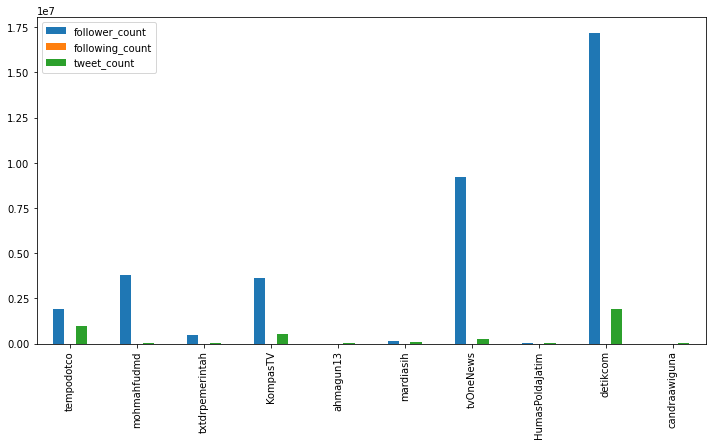

In [116]:
data = deg_df_tmp[['follower_count', 'following_count', 'tweet_count']].head(10)
data.plot(kind='bar', figsize=(12,6))

### Analisa korelasi antara jumlah follower, following, dan tweet count terhadap degree centrality

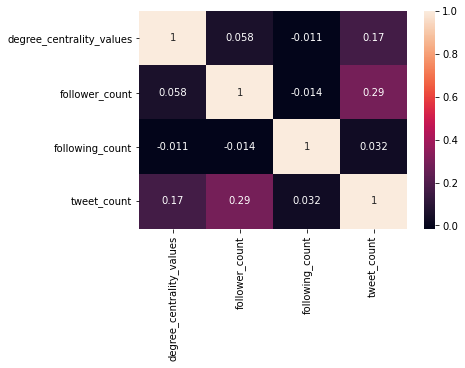

In [71]:
# mebuat correlation matrix
corr = deg_df_sample.corr()

# plot heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)